In [35]:
# from coffea.nanoevents import TreeMakerSchema, BaseSchema, NanoEventsFactory
# from fit_functions import fit_unbinned_double_gauss_Z, fit_unbinned_gauss_Z_with_background
import matplotlib.pyplot as plt
import uproot as up
import numpy as np
import pandas as pd
import awkward as ak
import mplhep as hep
hep.style.use(hep.style.CMS)
import ROOT

In [36]:
# dataset = '../outputs/2022MC_ZmmJpsimm_AllCandidates.root'
dataset = 'temp.root'
file = up.open(dataset)

In [37]:
events = file['ntuple;1']
columns = ['Event', 'B_Ups1_mass', 'B_Ups2_mass', 'FourL_mass', 'FourL_VtxProb']
branches = events.arrays(columns)

In [38]:
def print_summary(data, text):
    events = len(data)
    candidates = np.sum(ak.num(branches['FourL_mass'], axis=1))

    print(f"Number of candidates {text}: {candidates}")
    print(f"Number of events {text}: {events}")

In [39]:
print_summary(branches, 'Preselection')

Number of candidates Preselection: 564
Number of events Preselection: 1


In [40]:
# convert to pandas dataframe
data_dict = {key: ak.to_list(branches[key][0]) for key in branches.fields}
df_candi = pd.DataFrame(data_dict)

In [41]:
df_candi

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,1.479554e+08,3.513953,94.719177,149.835281,0.895795
1,2.093336e+08,3.169500,109.143196,129.097641,0.777627
2,7.411757e+08,0.611991,91.712074,132.997742,0.151969
3,1.111778e+09,3.642723,88.563942,127.648521,0.622106
4,1.042975e+09,3.392055,92.376175,127.070206,0.938527
...,...,...,...,...,...
559,7.264268e+08,3.312600,88.101357,113.749634,0.467381
560,1.108537e+09,2.855828,87.029114,113.761093,0.069011
561,3.151913e+08,2.829527,93.962677,115.602463,0.753218
562,1.289457e+09,3.214975,90.988510,145.121918,0.112856


In [42]:
df_candi[df_candi.duplicated(subset='Event', keep=False)].sort_values('Event', ascending=False)

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
557,2.804769e+09,1.537719,98.519264,132.558853,0.553339
556,2.804769e+09,3.340744,98.519264,151.309113,0.579934
318,1.326280e+09,3.252593,92.003754,132.932968,0.405388
317,1.326280e+09,2.808679,92.003754,140.129318,0.686308
63,1.101990e+09,2.864517,91.756851,124.097099,0.086954
62,1.101990e+09,3.139011,91.756851,124.829597,0.630934
211,6.832702e+08,3.000949,88.741364,139.086853,0.017269
210,6.832702e+08,3.854237,88.741364,152.804886,0.419364
197,5.396266e+08,3.077889,102.521210,154.259262,0.037669
198,5.396266e+08,3.077889,88.643562,145.411270,0.033160


In [43]:
# for duplicated events, keep the one with the highest FourL_VtxProb
df_events = df_candi.sort_values('FourL_VtxProb', ascending=False).drop_duplicates('Event').sort_index()

In [44]:
df_events

,Event,B_Ups1_mass,B_Ups2_mass,FourL_mass,FourL_VtxProb
0,1.479554e+08,3.513953,94.719177,149.835281,0.895795
1,2.093336e+08,3.169500,109.143196,129.097641,0.777627
2,7.411757e+08,0.611991,91.712074,132.997742,0.151969
3,1.111778e+09,3.642723,88.563942,127.648521,0.622106
4,1.042975e+09,3.392055,92.376175,127.070206,0.938527
...,...,...,...,...,...
559,7.264268e+08,3.312600,88.101357,113.749634,0.467381
560,1.108537e+09,2.855828,87.029114,113.761093,0.069011
561,3.151913e+08,2.829527,93.962677,115.602463,0.753218
562,1.289457e+09,3.214975,90.988510,145.121918,0.112856


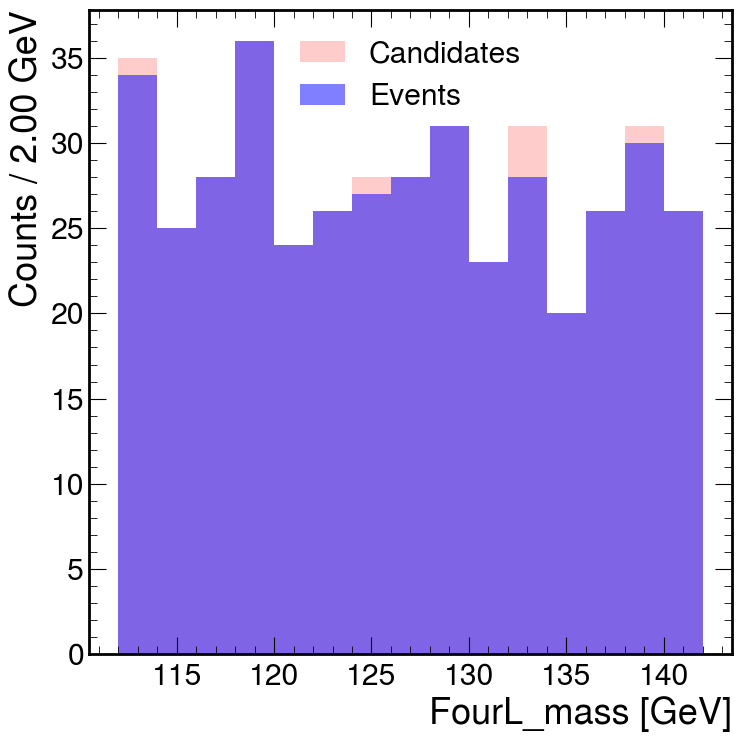

In [45]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 15, 112, 142
# plt.hist(ak.flatten(branches['FourL_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['FourL_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("FourL_mass [GeV]")
plt.legend()
plt.tight_layout()

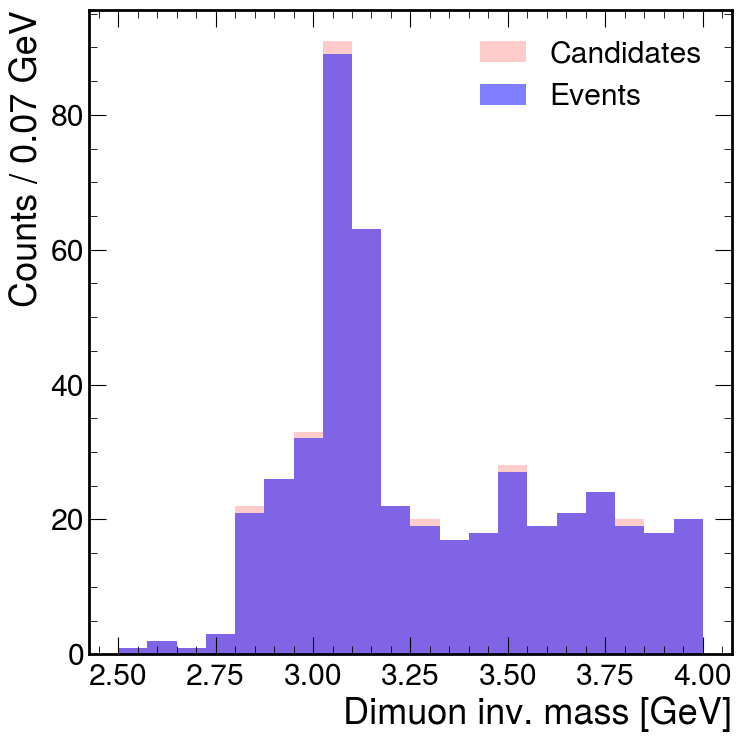

In [50]:
plt.figure(figsize=(8, 8))
# nbins, xlow, xhigh = 7, 9, 9.7
nbins, xlow, xhigh = 20, 2.5, 4
# plt.hist(ak.flatten(branches['B_Ups1_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups1_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

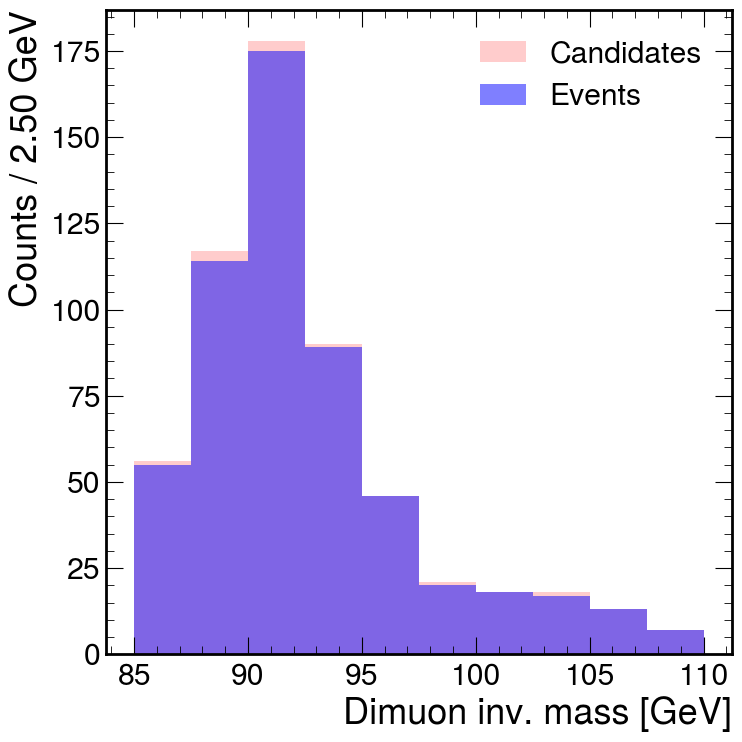

In [47]:
plt.figure(figsize=(8, 8))
nbins, xlow, xhigh = 10, 85, 110
# plt.hist(ak.flatten(branches['B_Ups2_mass']), bins=nbins, range=(xlow, xhigh))
plt.hist(df_candi['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='r', alpha=0.2, label='Candidates')
plt.hist(df_events['B_Ups2_mass'], bins=nbins, range=(xlow, xhigh), color='b', alpha=0.5, label='Events')
plt.ylabel(f"Counts / {(xhigh-xlow)/nbins:.2f} GeV")
plt.xlabel("Dimuon inv. mass [GeV]")
plt.legend()
plt.tight_layout()

In [25]:
nbins, xlow, xhigh = 100, 70, 110
B_J_mass_candidates = ak.flatten(B_J_mass).to_numpy()
mass = ROOT.RooRealVar("B_J_mass", "DiMuon mass", xlow, xhigh, "GeV")
data = ROOT.RooDataSet.from_numpy({'B_J_mass': B_J_mass_candidates}, [mass])

[#0] WARNING:DataHandling -- RooDataSet.from_numpy() Ignored 413 out-of-range events


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (background,gaussian)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     2 a1           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     3 a2           1.00000e-01  2.00000e+00   -1.00000e+01  1.00000e+01
     4 mean         9.10000e+01  2.00000e+00    8.00000e+01  1.00000e+02
     5 nbkg         1.00000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     6 nsig         1.50000e+04  2.50000e+03    0.00000e+00  2.50000e+04
     7 sigma        2.00000e+00  9.50000e-01    1.00000e-01

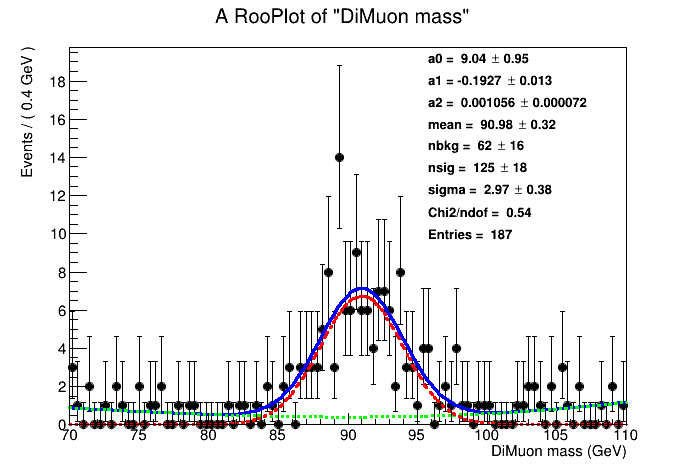

In [26]:
frame = fit_unbinned_gauss_Z_with_background(data, mass, nbins)

# Draw the frame on the canvas
canvas = ROOT.TCanvas("canvas", "Z Candidates")
frame.Draw()
canvas.Draw()